## Instructions {-}
Ce sujet est constitu√© de deux parties : la partie 1 correspond au sujet donn√© l'an dernier, dont la correction vous est donn√©e, la partie 2 constitue la partie qui sera √©valu√©e et se place dans la continuit√© de la partie 1.

# Enonc√© du probl√®me (Partie 1)

L'objectif de ce projet est d'estimer la longueur de c√¢ble sous-marin n√©cessaire pour relier deux c√¥tes $A$ et $B$  en utilisant des simulations conditionnelles.


Le c√¢ble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discr√©tis√© par une s√©quence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ o√π $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de c√¢ble n√©cessaire par la somme 
des longueurs sur les segments de la discr√©tisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situ√©es sur des points de discr√©tisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un mod√®le probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discr√©tisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la r√©alisation
d'un vecteur al√©atoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'esp√©rance ne contient qu'une seule valeur $\mu$ 
r√©p√©t√©e $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
d√©finis par $\sigma_{ij}=C(|x_i-x_j|)$ o√π $C$ est une
fonction d√©croissante, traduisant le fait que deux points 
g√©ographiquement proches ont tendance √† avoir des profondeurs plus similaires que deux points √©loign√©s.

On supposera que la matrice de covariance ainsi 
g√©n√©r√©e est d√©finie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliqu√©es aux termes d'une matrice de distance, produisent des matrices d√©finie-positives). 

Si on note $L$ la variable al√©atoire donnant la longueur de cable n√©cessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'esp√©rance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantit√© est difficilement accessible par le calcul. 
On va donc avoir recours √† des
simulations conditionnelles. C'est-√†-dire que l'on va simuler 
un nombre $K$ de r√©alit√©s (disons des r√©alisations du mod√®le 
probabiliste choisi), et sur chacune d'entre elle, 
la quantit√© de c√¢ble n√©cessaire sera √©valu√©e. 
On disposera ainsi d'un √©chantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simul√©es. Puis on approchera l'esp√©rance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'√©crire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de donn√©es fourni et d'en d√©duire une estimation de la longueur de c√¢ble n√©cessaire.

## Questions th√©oriques

1. Quel th√©or√®me du cours nous autorise-t-il √† estimer l'esp√©rance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en v√©rifiant que $L$ est bien int√©grable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discr√©tisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes ind√©pendantes, toutes d'esp√©rance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ o√π $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En d√©duire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 √† la loi conditionnelle (on calculera en particulier l'esp√©rance conditionnelle de $\mathbf{Z}$ sachant les donn√©es et la d√©composition de Cholesky de la matrice de covariance conditionnelle sachant les donn√©es).*

## Donn√©es du probl√®me
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les donn√©es $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'esp√©rance de chaque composante du vecteur al√©atoire $\mathbf{Z}$ est donn√©e par $\mu=-5.$

La fonction $C$ est d√©finie par $$C(h)=\sigma^2 e^{-|h|/a},$$

o√π $|h|$ correspond √† la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Impl√©mentation

### Pr√©ambule

In [1]:
#Chargement de d√©pendances

import numpy as np
import matplotlib.pyplot as plt

#Discr√©tisation
A=0
B=500
N=101 #Nombre de points de discr√©tisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Param√®tres du mod√®le

mu=-5
a = 50
sigma2 = 12

#Donn√©es

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observ√©es

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le param√®tre $a$, et le param√®tre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance √† cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [2]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [3]:
distmat=abs(np.subtract.outer(discretization,discretization))
distmat

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [4]:
Sigma=Covexp(distmat,a,sigma2)
Sigma

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [5]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'esp√©rance conditionnelle des composantes non observ√©es connaissant les observations et la repr√©senter avec les donn√©es.

In [6]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

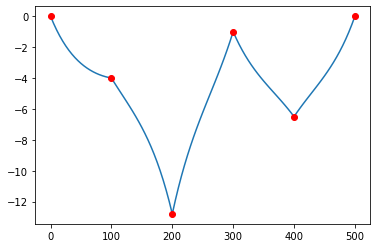

In [7]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [8]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

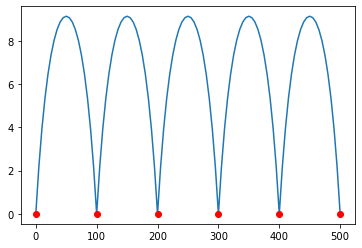

In [9]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de donn√©es (puisque la valeur est fix√©e) puis qu'elle augmente lorsqu'on s'√©loigne des donn√©es*

7. Effectuer une simulation conditionnelle. Sur un m√™me graphique, tracer la simulation ainsi que les donn√©es et l'esp√©rance conditionnelle. Commenter.

In [10]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

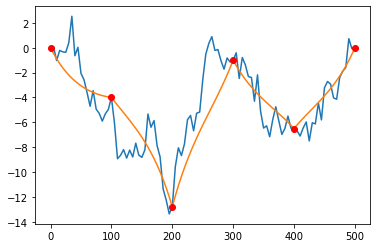

In [11]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'esp√©rance conditionnelle est lisse car c'est la fonction des donn√©es qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du mod√®le et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du c√¢ble en fonction du vecteur des profondeurs et du pas de discr√©tisation.

In [12]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du c√¢ble √† partir de 100 simulations. Comparer l'esp√©rance conditionnelle (estim√©e) de la longueur avec la longueur de l'esp√©rance conditionnelle.

In [13]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [14]:
sum(result)/K

522.4316989366897

In [15]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les r√©sultats pour 100000 simulations (comparer la vitesse d'√©x√©cution avec votre code pour voir l'int√©r√™t de la vectorisation).*

*On voit ici que la longueur donn√©e par l'esp√©rance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est d√ª au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'esp√©rance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit o√π on a utilis√© une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Repr√©senter la suite $M_n$ des moyennes des longueurs de c√¢bles en fonction du nombre de simulations. Commenter.

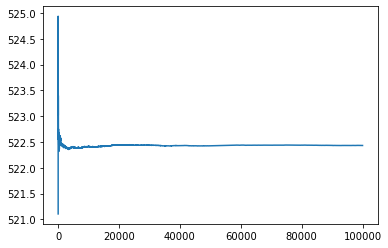

In [16]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'apr√®s la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles apr√®s quelques dizaines de milliers de simulations*

11. Repr√©senter l'histogramme des longueurs de c√¢bles g√©n√©r√©es.

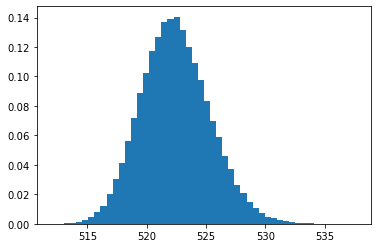

In [17]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble √† une densit√© gaussienne, avec n√©anmoins une l√©g√®re dissym√©trie (plus de valeurs fortes).*

12. Donner un intervalle de confiance √† 95% de la longueur du c√¢ble par 2 m√©thodes diff√©rentes. Commenter.

*1√®re m√©thode : par approximation gaussienne. L'histogramme pr√©c√©dent sugg√®re qu'une loi gaussienne peut bien repr√©senter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'√©cart type de l'√©chantillon de longueurs de c√¢ble puis en appliquant la formule du cours.*

In [18]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7678227427208, 528.0955751306586]

*2e m√©thode : on extrait les quantiles √† 2.5% et 97.5% de l'√©chantillon, c'est-√†-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [19]:
np.quantile(result,[0.025,0.975])

array([517.12194227, 528.41619233])

*ATTENTION : ici l'utilisation du TCL tel qu'expos√© au d√©but du chapitre 5 fournissait un intervalle de confiance de l'**esp√©rance de la longueur de c√¢ble** et non de la **longueur de c√¢ble** (erreur fr√©quente).*

*On voit par ailleurs que la 2e m√©thode est plus pr√©cise car elle est bas√©e directement sur la loi empirique de l'√©chantillon*

13. Donner une estimation de la probabilit√© que la longueur du c√¢ble d√©passe 525 m.

In [20]:
np.mean(result>525)

0.18452

14. Reprendre les questions pr√©c√©dentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des diff√©rentes quantit√©s calcul√©es : moyennes, quantiles, probabilit√© de d√©passement de seuil.*

# Enonc√© 2021 (Partie 2)

Nous nous pla√ßons dans le m√™me cadre que ci-dessus. Nous tenons pour acquis les r√©sultats pr√©c√©dents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur pr√©sentent des valeurs positives, ce qui n'a pas de sens si on consid√®re qu'il n'y a pas de partie √©merg√©e entre les deux c√¥tes. Proposer et impl√©menter un algorithme de type rejet qui ne g√©n√®rera que des valeurs n√©gatives. Repr√©senter un profil de profondeur g√©n√©r√©.

On effectue la simulation comme en Question 7 avec une m√©thode de rejet :

In [21]:
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

In [22]:
def rejet(Ec):
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x) #partie sans le rejet
    simui=np.copy(simu) # partie sans le rejet sauvegard√©
    while len(simu[simu >0]) !=0 : #Puis tant qu'il y a des valeurs positives, et on r√©effectue la simulation
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)

    return simu, simui

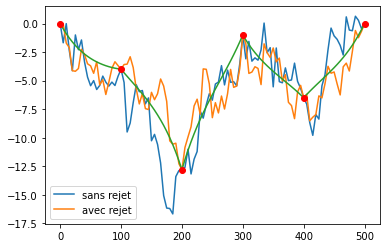

In [23]:
simu,simui = rejet(Ec)

allval3p = np.zeros(N)
allval3p[unknown_indexes]=simu
allval3p[observation_indexes]=depth

allval3 = np.zeros(N)
allval3[unknown_indexes]=simui
allval3[observation_indexes]=depth

plt.plot(discretization,allval3,label="sans rejet")
plt.plot(discretization,allval3p,label ="avec rejet")
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.legend()
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de c√¢ble ? Sur l'histogramme des longueurs de c√¢ble ? Sur l'intervalle de confiance obtenu par la m√©thode des quantiles ? Sur la probabilit√© de d√©passement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Consid√©rer 10000 simulations.

#### Impacte sur la valeur moyenne de longueur de c√¢ble.

In [24]:
allval3 = np.zeros(N)
allval3[observation_indexes]=depth
allval3p = np.zeros(N)
allval3p[observation_indexes]=depth


K=10000
result = np.zeros(K)
resulti = np.zeros(K) # resultat initial sans rejet

for i in range(K):
    
    simu,simui = rejet(Ec)
        
    allval3[unknown_indexes]= simui
    allval3p[unknown_indexes]= simu
    result[i]=length(allval3p,Delta)
    resulti[i]=length(allval3,Delta)
    
a=sum(result)/K
b=sum(resulti)/K
print(f"Avec m√©thode du rejet : {a}" , f"sans rejet : {b}", f"diff√©rence : {a-b} ")

Avec m√©thode du rejet : 521.7697116103111 sans rejet : 522.4467402932386 diff√©rence : -0.677028682927471 


On observe une diff√©rence tr√®s faible.

#### D√©placement de la gaussienne

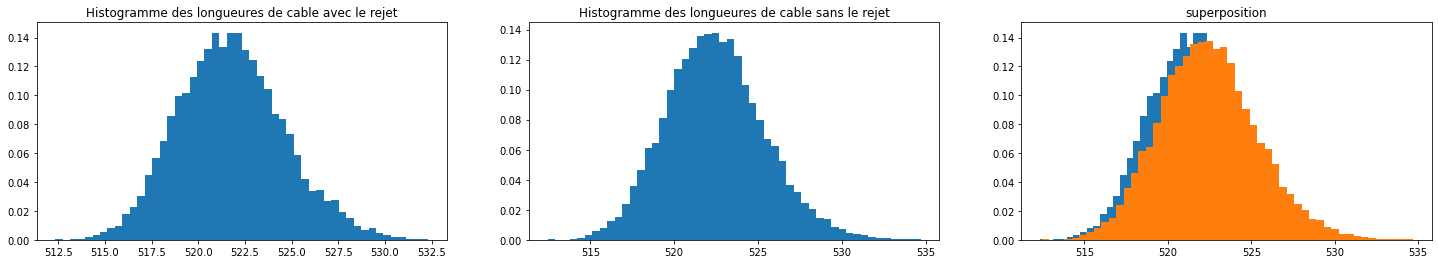

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figwidth(25)
ax1.hist(result,50,density=True)
ax1.set_title("Histogramme des longueures de cable avec le rejet")
ax2.hist(resulti,50,density=True)
ax2.set_title("Histogramme des longueures de cable sans le rejet")
ax3.hist(result,50,density=True)
ax3.hist(resulti,50,density=True)
ax3.set_title("superposition")
plt.show()

L'histogramme ressemble toujours √† une gaussienne, mais l√©g√®rement d√©cal√©e vers la gauche

#### Interval de confiance √† 95% :

In [26]:
Ln = sum(result)/K
sigman = np.std(result)
Lni = sum(resulti)/K
sigmani = np.std(resulti)

print(f"Avec la m√©thode du rejet : {[Ln - sigman*1.96,Ln + sigman*1.96]}")
print(f"Sans la m√©thode du rejet : {[Lni - sigmani*1.96,Lni + sigmani*1.96]}")

Avec la m√©thode du rejet : [516.2155908560926, 527.3238323645296]
Sans la m√©thode du rejet : [516.7305790464358, 528.1629015400414]


Le r√©sulat est tr√®s proche de la m√©thode sans rejet.

####  Sur la probabilit√© de d√©passement du seuil de 525 m :

In [27]:
print(f"Estimation du seuil de d√©passement de 525m avec rejet : {np.mean(result>525)}")
print(f"Estimation du seuil de d√©passement de 525m sans rejet : {np.mean(resulti>525)}")

Estimation du seuil de d√©passement de 525m avec rejet : 0.1282
Estimation du seuil de d√©passement de 525m sans rejet : 0.1866


La probabilit√© est plus faible que dans la partie 1.

#### Estimation du taux de rejet

Il suffit de connaitre, par tour de boucle, le nombre de position que l'on doit simuler √† nouveau afin d'obtenir des coordonn√©es n√©gatives

In [28]:
rejett = np.zeros(K)
for i in range(K):
    ind = 0
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    while len(simu[simu >0]) !=0 :
        ind = ind + 1
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        
    rejett[i] = ind

print(f"Taux de rejet moyen : {(rejett.sum()/(rejett.sum()+K))*100} %") 

Taux de rejet moyen : 96.21107351654055 %


On observe un taux de rejet tr√®s √©lev√©.

## Approche Bay√©sienne

Dans la premi√®re partie, on a consid√©r√© que l'ensemble des param√®tres du mod√®le √©tait parfaitement connu. Toutes choses √©gales par ailleurs, on va maintenant consid√©rer que la moyenne $\mu$ est issue d'une estimation ent√¢ch√©e d'une incertitude. Plus pr√©cis√©ment, on va mod√©liser cette incertitude en consid√©rant que $\mu \sim \mathcal{N}(-5,4)$.

On va √©galement d√©composer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions th√©oriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
o√π $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : √©crire la densit√© jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densit√© puis identifier la forme quadratique faisant intervenir $\mu$.

On a  :
$$f_{\mathbf{Z}_{\text{OBS}},\mu}(\mathbf{z}_{\text{OBS}},\widehat{\mu}) = f_{\mathbf{Z}_{\text{OBS}}|\mu=\widehat{\mu}}(\mathbf{z}_{\text{OBS}})f_{\mu}(\widehat{\mu})$$     
et : 
$$f_{\mathbf{Z}_{\text{OBS}},\mu}(\mathbf{z}_{\text{OBS}},\widehat{\mu}) = f_{\mu|\mathbf{Z}_{\text{OBS}}=\mathbf{z}_{\text{OBS}}}(\widehat{\mu})f_{\mathbf{Z}_{\text{OBS}}(\mathbf{z}_{\text{OBS}}})$$
sachant : 
$\mathbf{Z}_{\text{OBS}} | \mu = \widehat{\mu} \sim \mathcal{N}(\widehat{\mu},C_{\text{OBS}})$ et $\mu \sim \mathcal{N}(-5,4)$     
Ainsi : $$-2\ln(f_{\mathbf{Z}_{\text{OBS}},\mu}(\mathbf{z}_{\text{OBS}},\widehat{\mu})) = (\mathbf{z}_{\text{OBS}}-\mathbf{1}{\widehat{\mu}})^{t}C_{\text{OBS}}^{-1}(\mathbf{z}_{\text{OBS}}-\mathbf{1}{\widehat{\mu}})+ (\frac{5+\widehat{\mu}}{2})^2+\ln(8\pi(2\pi)^6det(C_{\text{OBS}}))$$



On peut identifier les termes en $\widehat{\mu}:$ $$\widehat{\mu}^2(\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})-2\widehat{\mu}(\mathbf{1}^{t}C_{\text{OBS}}^{-1}\mathbf{z}_{\text{OBS}}-\frac{5}{4})$$   

Ainsi : $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$   
o√π : $$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$
et : $$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs al√©atoires √† densit√©, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

D'apr√®s la formule du contionnement pour les densit√©s ($f_{V|Z=z}$ est une densit√© ) on a : $f_{X,Y|Z = z}(x,y) = f_{[X|Y=y]|Z = z}(x).f_{Y|Z = z}(y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=z}(y)$

5. En d√©duire que la densit√© de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'√©crit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique √† la densit√© $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilis√©e dans la partie 1 avec $\mu = \mu^\star$

D'apr√®s la question pr√©cedente on a :      
      
$f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}} (z,x) = f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(x) . f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}} (z)$   
avec : $$ f_{Z_{UNK}|\mu=\mu^\star,Z_{OBS}=z_{OBS}}(z)= \frac{1}{(2\pi)^{(N-6)/2}\sqrt{det(A)}}exp(-\frac{1}{2}(z-g(z))^tA^{-1}(z-g(z)))) $$

o√π : 
$g(z)=(\mu^\star+CC_{OBS}^{-1}(z-\mu^\star))$   
$A=C_{UNK}-C_{UNK,Z}C_Z^{-1}C_{Z,UNK}$    
et : $f_{\mu|Z_{OBS}=z_{OBS}}(x) = \frac{1}{\sqrt{2\pi}\widehat{\sigma}}exp(-\frac{(x-\widehat{\mu})^2}{2\widehat{\sigma}^2}) $

### Simulation

On va maintenant chercher √† simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En premi√®re approche, on pourrait chercher √† obtenir la densit√© de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plut√¥t proc√©der par simulations en cascade, c'est-√†-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord g√©n√©rer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

In [29]:
One = np.array([1,1,1,1,1,1])

A= np.dot(One.T,np.linalg.inv(SigmaObs))
B= np.dot(A,One)
sigma2_m = 1/(1/4 + B)
C = np.dot(A,depth)
¬µ_m = sigma2_m * (C-5/4)

print(f"sigma2_m :{sigma2_m}",f"¬µ_m : {¬µ_m}")

sigma2_m :1.5368909974762894 ¬µ_m : -4.291350330933772


7. Calculer la probabilit√© de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et impl√©menter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

$P_1 = P {\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\} } = \int_{0}^{\infty}f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}(x) dx = \int_{0}^{\infty} \frac{1}{\sqrt{2\pi}\widehat{\sigma}}exp(-\frac{(x-\widehat{\mu})^2}{2\widehat{\sigma}^2}) \, \mathrm{d}x $

In [30]:
import scipy.integrate as integrate

In [31]:
def f(x) :
    a = 1/(2*sigma2_m*np.pi)**(0.5)
    b = ((x-¬µ_m)**2)* 1/(2*sigma2_m)
    
    return(a * np.exp(-b))

P1 = integrate.quad(f,0,np.inf)[0]

print(f"P(mu|Zobs=zobs>0) = {P1}")

P(mu|Zobs=zobs>0) = 0.0002685226388166117


Simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$ :

In [32]:
l=100
x=(np.random.normal(¬µ_m,sigma2_m,l)) # x = ùúá|ùêôOBS=ùê≥OBS , ¬µ <0

while len(x[x>0]) >0 : # m√©thode du rejet
    x = np.random.normal(¬µ_m,sigma2_m,l)


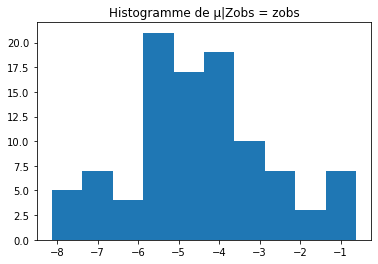

In [33]:
plt.hist(x,10,density=False)
plt.title("Histogramme de ¬µ|Zobs = zobs")

plt.show()


8. G√©n√©rer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et repr√©senter le profil de profondeur obtenu. On prendra soin de ne g√©n√©rer que des valeurs n√©gatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section pr√©c√©dente.

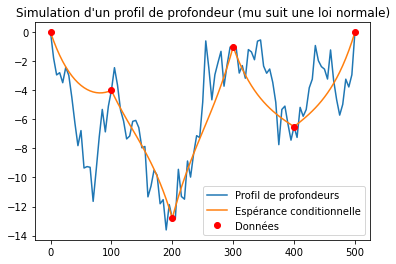

In [34]:
mu_e = x[0] # On prend la premi√®re valeur de l'ancienne simulation
Ec= mu_e + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu_e))


allvalu = np.zeros(N)
allvalu[unknown_indexes] = Ec
allvalu[observation_indexes] = depth

allvalu1 = np.zeros(N)
allvalu1[unknown_indexes] = rejet(Ec)[0]
allvalu1[observation_indexes] = depth

plt.plot(discretization,allvalu1, label="Profil de profondeurs")
plt.plot(discretization,allvalu, label="Esp√©rance conditionnelle")
plt.plot(discretization[observation_indexes], depth, 'ro', label="Donn√©es")
plt.legend()
plt.title("Simulation d'un profil de profondeur (mu suit une loi normale)")
plt.show()

9. G√©n√©rer 10000 profils de profondeur et calculer les longueurs de c√¢ble associ√©es. Comparer la valeur moyenne de la longueur de c√¢ble, dont on visualisera la convergence, l'histogramme des longueurs de c√¢ble, l'intervalle de confiance obtenu par la m√©thode des quantiles, la probabilit√© de d√©passement du seuil de 525 m avec les r√©sultats obtenus pr√©c√©demment. Commenter.

In [36]:
K=10000
x=(np.random.normal(¬µ_m,sigma2_m,K)) 

while len(x[x>0]) >0 : 
    x[x>0] = np.random.normal(¬µ_m,sigma2_m,K)[x>0]
    
resultb = np.zeros(K)
for i in range(K):
    mu_e = x[i]
    Ec= mu_e + np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu_e))

    allval7 = np.zeros(N)
    allval7[unknown_indexes] = rejet(Ec)[0]
    allval7[observation_indexes] = depth
    resultb[i]=length(allval7,Delta)

In [37]:
sum(resultb)/K

521.7085737318674

La longueure de cable semble √™tre environ la m√™me que pr√©c√©demment.

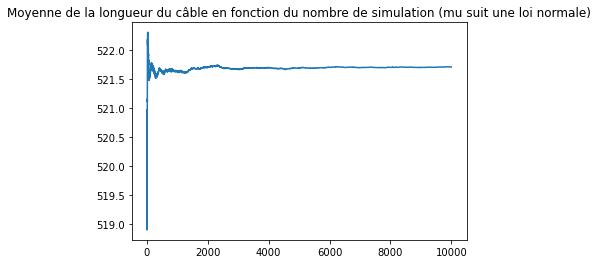

In [38]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(resultb)/indice_simu)
plt.title("Moyenne de la longueur du c√¢ble en fonction du nombre de simulation (mu suit une loi normale)")
plt.show()

Le graphique de convergence ressemble au graphique de la partie I.

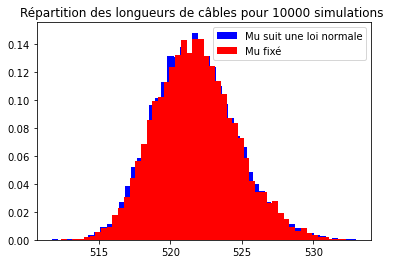

In [47]:
plt.hist(resultb,50,density=True,color='b')
plt.hist(result,50,density=True,color='r')
plt.title(f"R√©partition des longueurs de c√¢bles pour {K} simulations ")
plt.legend(['Mu suit une loi normale', 'Mu fix√©'])
plt.show()

L'histogramme est une gaussienne mais un peu plus √©tal√© que lorsque mu est fix√©.

In [40]:
np.quantile(result,[0.025,0.975])

array([516.6425664 , 527.71693225])

R√©sultat est tr√®s proche de celui trouv√© via la m√©thode du rejet.

In [41]:
np.mean(result>525)

0.1282

On a des valeurs encore une fois proche de la celles de la m√©thode du rejet

10. Qu'adviendrait-il selon vous si on rendait √©galement al√©atoires les autres param√®tres du mod√®le $\sigma^2$ et $a$ ?

Puisque faire suivre √†  ùúá  une loi normale ne change pas beaucoup les r√©sultats, on va s'attendre √† ce que changer  ùúé2  ne modifie pas beaucoup le mod√®le √©galement.
Cependant, changer la valeur de  ùëé  aura probablement une grande influence sur la longueur des c√¢bles (ùëé apparait au sein d'une exponentielle)

11. (facultatif) On suppose d√©sormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, o√π $\sigma^2$ correspond au param√®tre qui intervient dans la fonction $C$. Donner l'expression de la densit√© de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le param√®tre $\alpha$ et analyser son impact sur les diff√©rentes quantit√©s √©valu√©es.

    Indication : Pour identifier la densit√© de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densit√© jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densit√© de $(\alpha,\mathbf{Z}_{\text{OBS}})$
